<a href="https://colab.research.google.com/github/ErikFantomex/Gym_Recommeder/blob/gymrecommender/recomendador_Fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema Recomendador de ejercicios para el gimnasio 

# pasos a seguir segun chatgpt

---
Un sistema recomendador en React es un tipo de aplicación web que utiliza técnicas de aprendizaje automático para analizar los datos del usuario y proporcionar recomendaciones personalizadas. El sistema recomendador puede utilizar diferentes técnicas, como filtrado colaborativo, filtrado basado en contenido o enfoques híbridos.

Para implementar un sistema recomendador en React, se necesita un backend que proporcione los datos para el análisis y la generación de recomendaciones. El backend puede ser construido con cualquier tecnología, como Python, Node.js o Ruby on Rails.

A continuación se muestra un ejemplo de cómo construir un sistema recomendador básico en React utilizando la biblioteca de gráficos D3.js:

    Configuración del proyecto

Primero, se necesita crear un nuevo proyecto React y configurar las dependencias. Esto se puede hacer utilizando el administrador de paquetes npm con el siguiente comando:

lua

npm create-react-app my-app

Luego, se deben instalar las dependencias de D3.js con el siguiente comando:

npm install d3

    Obtener datos

El siguiente paso es obtener los datos que se utilizarán para el análisis y las recomendaciones. Esto puede ser cualquier tipo de datos, como una lista de productos o una lista de películas.

    Análisis de datos

Una vez que se han obtenido los datos, se necesita realizar el análisis de los mismos para generar las recomendaciones. Para esto, se pueden utilizar diferentes técnicas de aprendizaje automático, como el filtrado colaborativo o el filtrado basado en contenido.

    Generación de recomendaciones

Una vez que se ha realizado el análisis de los datos, se pueden generar las recomendaciones para el usuario. Las recomendaciones se pueden mostrar en diferentes formas, como una lista de productos o una lista de películas.

    Integración en React

Finalmente, se puede integrar el sistema recomendador en la aplicación web de React. Esto se puede hacer utilizando la biblioteca de gráficos D3.js para mostrar los datos y las recomendaciones al usuario.

En resumen, construir un sistema recomendador en React implica configurar un proyecto React, obtener los datos, realizar el análisis de los mismos, generar las recomendaciones y finalmente integrar todo en la aplicación web de React.



# Crear un backend

Para crear un backend en Python que permita hacer recomendaciones personalizadas, se necesitan los siguientes pasos:

    Obtener y preprocesar los datos:
    Antes de poder hacer cualquier recomendación, se deben obtener los datos relevantes y preprocesarlos de tal forma que puedan ser utilizados para el análisis. Los datos pueden estar en diferentes formatos, como una base de datos, un archivo CSV o un archivo JSON. Una vez obtenidos, se deben limpiar y transformar para poder ser utilizados para la recomendación.

    Elegir una técnica de recomendación:
    Existen diferentes técnicas de recomendación, tales como filtrado colaborativo, filtrado basado en contenido, y enfoques híbridos. Se debe elegir la técnica que mejor se adapte a los datos disponibles y a las necesidades de la aplicación.

    Implementar la técnica de recomendación elegida:
    Una vez seleccionada la técnica de recomendación, se debe implementar en Python utilizando las herramientas y librerías adecuadas. Por ejemplo, si se utiliza filtrado colaborativo, se pueden utilizar librerías como Surprise o Scikit-learn.

    Entrenar el modelo:
    Antes de poder hacer recomendaciones, se debe entrenar el modelo con los datos procesados y la técnica de recomendación elegida. Para esto, se pueden utilizar algoritmos de aprendizaje automático como regresión lineal o redes neuronales.

    Integrar el backend con la aplicación:
    Finalmente, se debe integrar el backend con la aplicación para poder hacer recomendaciones personalizadas en tiempo real. Esto puede hacerse utilizando una API RESTful que permita a la aplicación enviar consultas al backend y recibir respuestas con las recomendaciones.

En resumen, para crear un backend en Python que permita hacer recomendaciones personalizadas se necesita obtener y preprocesar los datos, elegir una técnica de recomendación, implementarla en Python, entrenar el modelo y finalmente integrar el backend con la aplicación.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install plotly==5.13.0 
#!pip install fuzzywuzzy

In [2]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
#Recomendacion
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import fuzz


ModuleNotFoundError: ignored

# Exploracion de datos 

In [3]:
gym_data = pd.read_csv('/content/drive/MyDrive/datasets/megaGymDataset.csv')
gym_data.columns = gym_data.columns.str.replace('Unnamed: 0', 'index')
gym_data
gym_data.shape
#limpiando datos 
missing_values_count = gym_data.isnull().sum()
missing_values_count
gym_data.dtypes

print("Filas cantidad:\t" + str(gym_data.shape[0]))
print("Columnas cantdad:\t" + str(gym_data.shape[1]))

count_exercises = gym_data.groupby(['BodyPart']).count()
count_exercises

count_exercises= count_exercises.sort_values(by='index', ascending= False)
fig = px.bar(count_exercises, x=count_exercises.index, y='index')
fig.show()
#Ejercicios para principiantes
beginner = gym_data[gym_data.Level == 'Beginner']
beginner
#Ejercicios solo con el cuerpo 
body_only =beginner[beginner.Equipment == 'Body Only']
body_only

beginner_bodyOnly = body_only.groupby(['BodyPart']).count()
beginner_bodyOnly= beginner_bodyOnly.sort_values(by='index')
fig = px.bar(beginner_bodyOnly, x=beginner_bodyOnly.index, y='index', color ='index')
fig.show()

bodyPart_dist=gym_data.groupby(['Type','BodyPart']).count()
bodyPart_dist

bodyPart_dist=bodyPart_dist.groupby(level=[0,1]).sum()
bodyPart_dist

allTypes =(gym_data["Type"].unique())
len(allTypes)

Filas cantidad:	2918
Columnas cantdad:	9


7

In [5]:
gym_data
appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


In [21]:
clean = gym_data.dropna(subset=['RatingDesc'])
clean['Rating']
clean.shape
clean['RatingDesc'] = 5
clean
clean= gym_data['Rating'].fillna(value=3)


<ipython-input-21-8978d40e5f1f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
typeDfs = []
for i in range(7):
    typeDfs.append(bodyPart_dist.iloc[bodyPart_dist.index.get_level_values('Type') == allTypes[i]])

cardio =bodyPart_dist.iloc[bodyPart_dist.index.get_level_values('Type') == 'Cardio']

In [ ]:


fig = make_subplots(
    rows=4, cols=2,
    specs=[[{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
           [{"type": "domain"},{"type": "domain"}],
          ])

fig.add_trace(go.Pie(values=typeDfs[0]['index'].values, title=allTypes[0], labels=typeDfs[0].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)
    
fig.add_trace(go.Pie(values=typeDfs[1]['index'].values, title=allTypes[1], labels=typeDfs[1].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)
fig.add_trace(go.Pie(values=typeDfs[2]['index'].values, title=allTypes[2], labels=typeDfs[2].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)
fig.add_trace(go.Pie(values=typeDfs[3]['index'].values, title=allTypes[3],labels=typeDfs[3].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)
fig.add_trace(go.Pie(values=typeDfs[4]['index'].values, title=allTypes[4], labels=typeDfs[4].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=3, col=1)
fig.add_trace(go.Pie(values=typeDfs[5]['index'].values, title=allTypes[5], labels=typeDfs[5].index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=3, col=2)
fig.add_trace(go.Pie(values=typeDfs[6]['index'].values, title=allTypes[6], labels=typeDfs[6].index,marker=dict(colors=['#100b','#f00560'], line=dict( width=2.5))),
              row=4, col=1)
fig.update_layout(height=900, showlegend=False)
fig.update_layout(height=1200, showlegend=False)

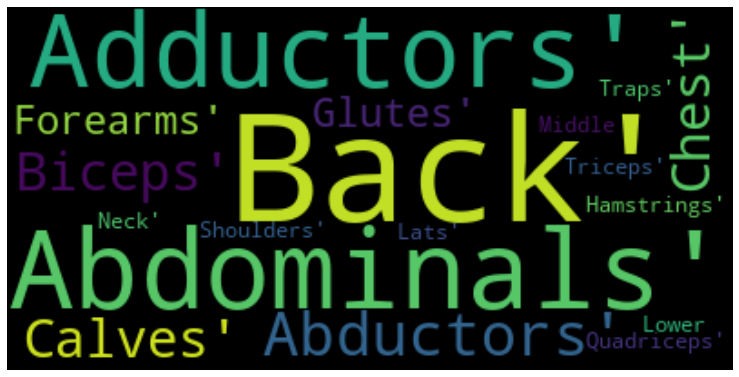

In [ ]:


text = gym_data["BodyPart"].unique()

wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

,index,Title,Desc,Type,BodyPart,Equipment,Rating,RatingDesc
Level,,,,,,,,
Beginner,459,459,108,459,459,459,459,369
Expert,13,13,10,13,13,13,7,7
Intermediate,2446,2446,1250,2446,2446,2446,565,486


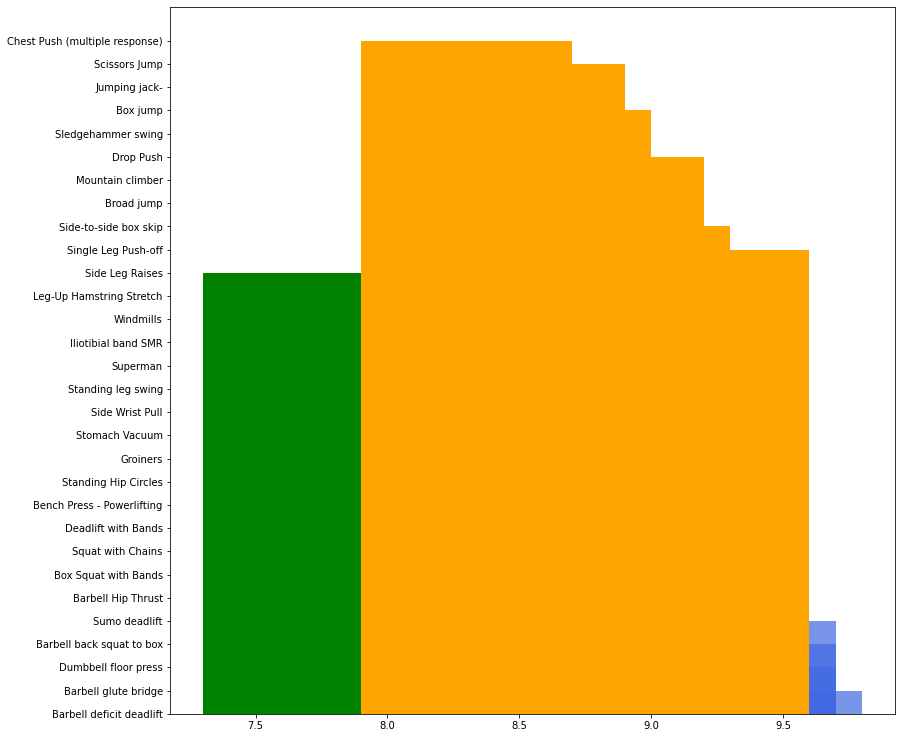

In [ ]:
ratingSorted= gym_data.sort_values(by='Rating',ascending=False)
ratingSorted =ratingSorted.head(10)
ratingSorted
#Top power lifting excersices
ratingSorted= gym_data[gym_data['Type']=='Powerlifting'].sort_values(by='Rating',ascending=False)
ratingSorted =ratingSorted.head(10)
plt.bar(ratingSorted.Rating, ratingSorted.Title,color='royalblue', alpha=0.7)
#Top Rated ejercicios de estiramiento
rating_stretch= gym_data[gym_data['Type']=='Stretching'].sort_values(by='Rating',ascending=False)
rating_stretch =rating_stretch.head(10)
plt.bar(rating_stretch.Rating, rating_stretch.Title,color='green')
#Top rated Plyometrics
rating_plyo= gym_data[gym_data['Type']=='Plyometrics'].sort_values(by='Rating',ascending=False)
rating_plyo =rating_plyo.head(10)
plt.bar(rating_plyo.Rating, rating_plyo.Title,color='orange')
#Porcentaje de ejercicios por niveles
level_counts=gym_data.groupby(['Level']).count()
level_counts

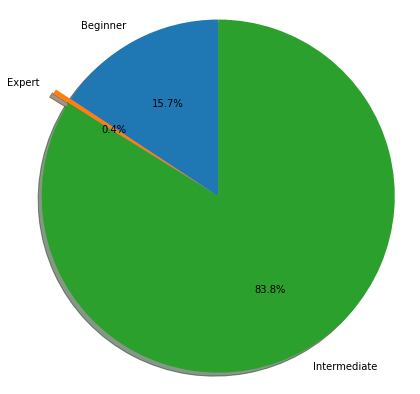

<Figure size 72x72 with 0 Axes>

In [ ]:
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(level_counts.Title, explode=explode, labels=level_counts.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(1,1))

plt.show()

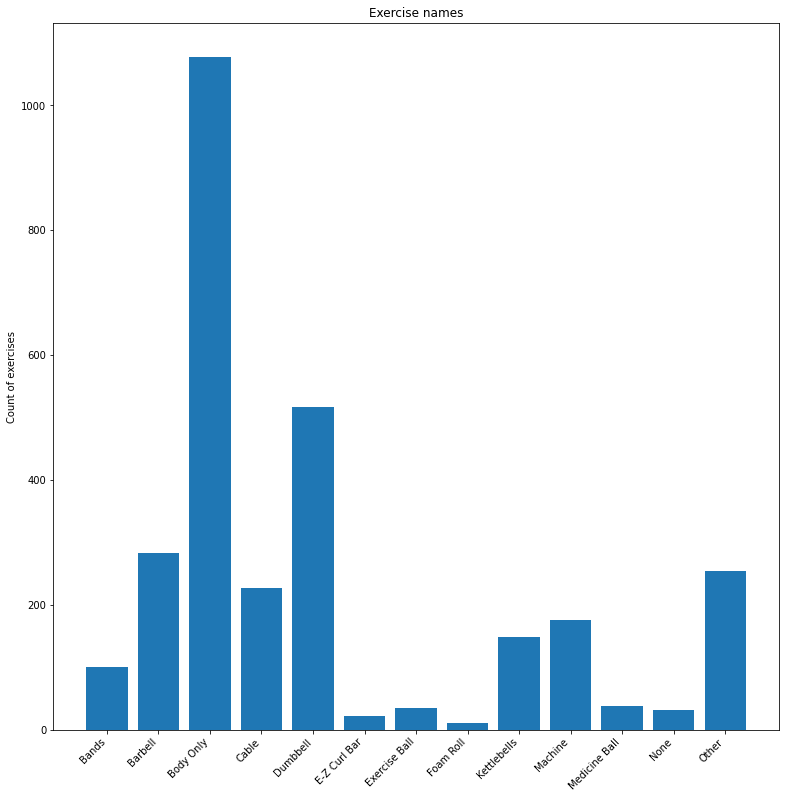

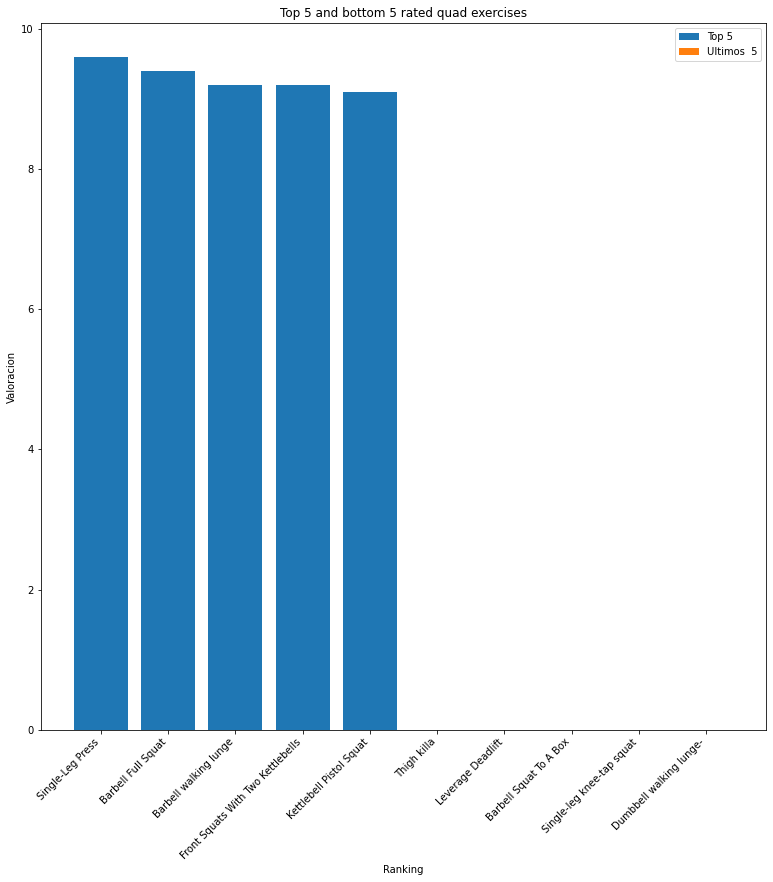

In [ ]:
equip_data=gym_data.groupby(['Equipment']).count()
equip_data
#
fig, ax = plt.subplots()

ax.bar(equip_data.index, equip_data.Title)

ax.set_ylabel('Count of exercises')
ax.set_title('Exercise names')
plt.xticks(rotation=45, ha='right')

plt.show()
#Mejores ejercicios para pierna 
leg_exer= gym_data[gym_data['BodyPart']=='Quadriceps'].sort_values(by='Rating',ascending=False)
leg_exer_best =leg_exer[leg_exer['Type']=='Strength'].head(5)
leg_exer_best
#Peor ejercicio para pierna 
leg_exer_worst= gym_data[gym_data['BodyPart']=='Quadriceps'].sort_values(by='Rating',ascending=True)
leg_exer_worst =leg_exer_worst[leg_exer_worst['Type']=='Strength'].head(5)
leg_exer_worst
#
plt.bar(leg_exer_best.Title,leg_exer_best.Rating, label = 'Top 5')
plt.bar(leg_exer_worst.Title,leg_exer_worst.Rating, label = 'Ultimos  5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Valoracion")
plt.title("Top 5 and bottom 5 rated quad exercises")
plt.legend()
plt.show()

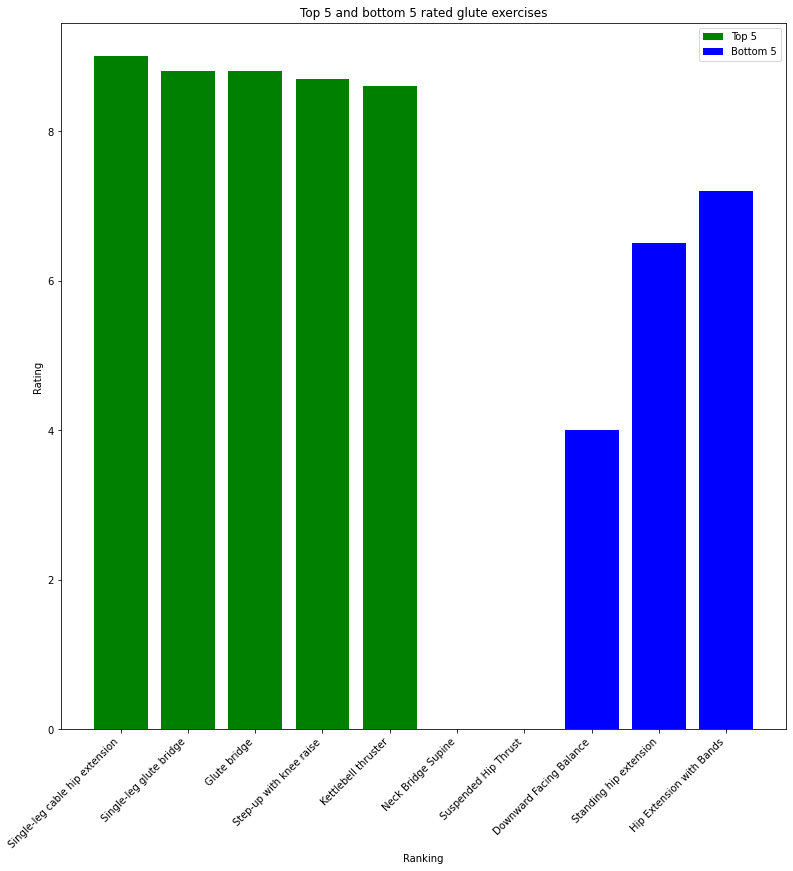

In [ ]:
glute_exer= gym_data[gym_data['BodyPart']=='Glutes'].sort_values(by='Rating',ascending=False)
glute_exer_best =glute_exer[glute_exer['Type']=='Strength'].head(5)

glute_exer_worst= gym_data[gym_data['BodyPart']=='Glutes'].sort_values(by='Rating',ascending=True)
glute_exer_worst =glute_exer_worst[glute_exer_worst['Type']=='Strength'].head(5)

     
plt.bar(glute_exer_best.Title,glute_exer_best.Rating,color='g', label = 'Top 5')
plt.bar(glute_exer_worst.Title,glute_exer_worst.Rating,color='b', label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated glute exercises")
plt.legend()
plt.show()

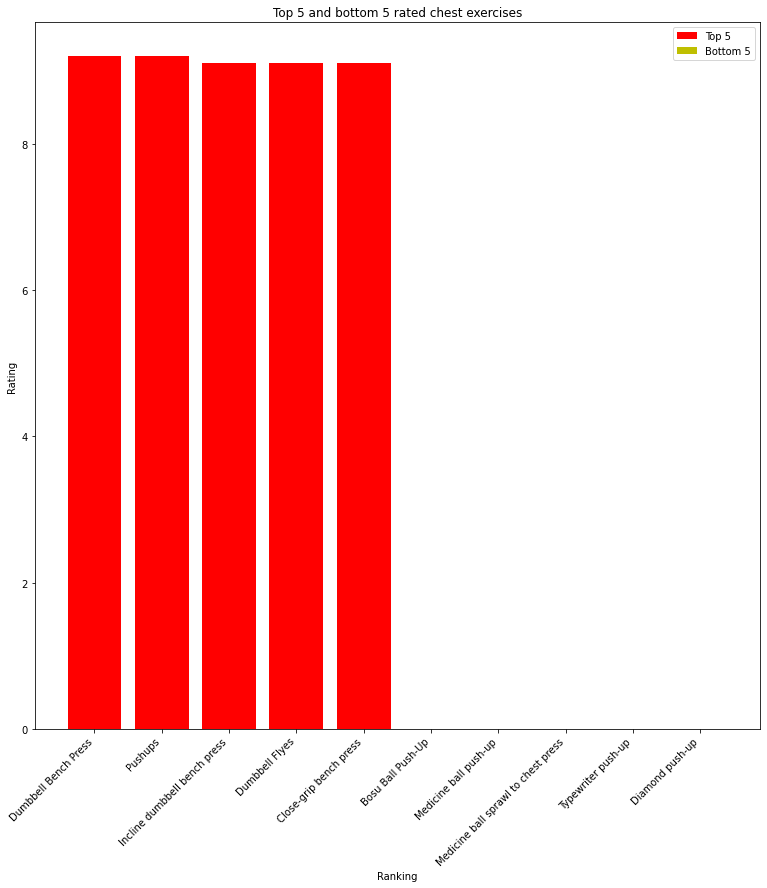

In [ ]:
#Mejores ejercicios para el upper body 
chest_exer= gym_data[gym_data['BodyPart']=='Chest'].sort_values(by='Rating',ascending=False)
chest_exer_best =chest_exer[chest_exer['Type']=='Strength'].head(5)

chest_exer_worst= gym_data[gym_data['BodyPart']=='Chest'].sort_values(by='Rating',ascending=True)
chest_exer_worst =chest_exer_worst[chest_exer_worst['Type']=='Strength'].head(5)

     
plt.bar(chest_exer_best.Title,chest_exer_best.Rating,color='r', label = 'Top 5')
plt.bar(chest_exer_worst.Title,chest_exer_worst.Rating,color='y', label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated chest exercises")
plt.legend()
plt.show()


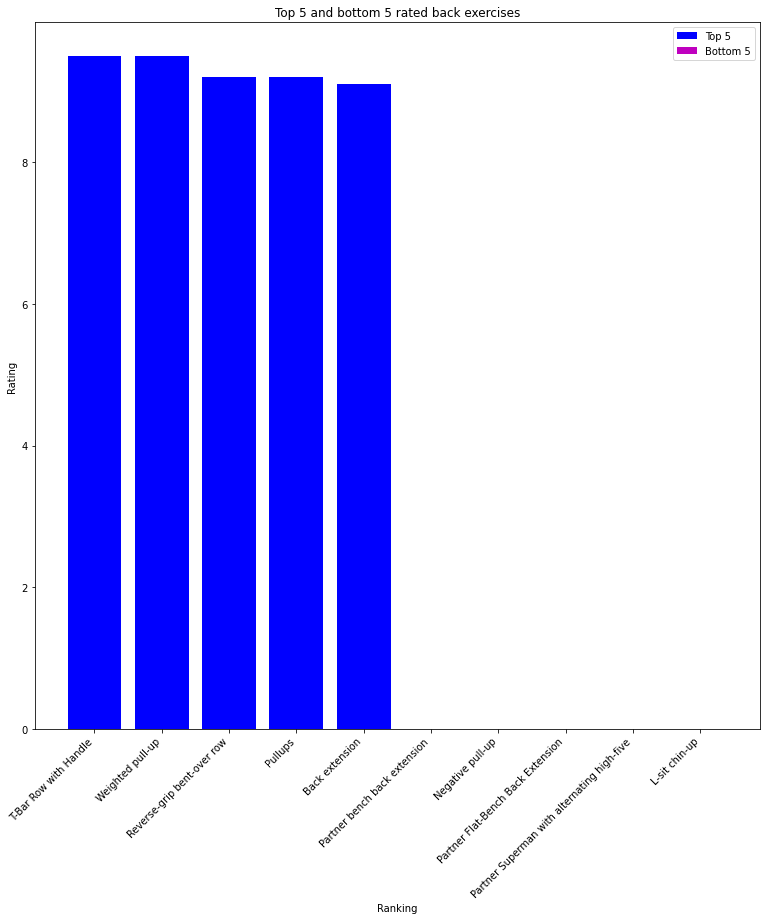

In [ ]:
options = ['Lats','Lower Back','Middle Back']
back_exer= gym_data[gym_data['BodyPart'].isin(options)].sort_values(by='Rating',ascending=False)
back_exer_best =back_exer[back_exer['Type']=='Strength'].head(5)

back_exer_worst= gym_data[gym_data['BodyPart'].isin(options)].sort_values(by='Rating',ascending=True)
back_exer_worst =back_exer_worst[back_exer_worst['Type']=='Strength'].head(5)

     
plt.bar(back_exer_best.Title,back_exer_best.Rating,color='b', label = 'Top 5')
plt.bar(back_exer_worst.Title,back_exer_worst.Rating,color='m', label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated back exercises")
plt.legend()
plt.show()


# Recomendacion con similaridad de coseno 

Funciones para recomendar 

In [ ]:

#Function to import the data from the csv file
def importData(filename):
    #fileName = "Data\steam.csv"
    df = pd.read_csv(filename, encoding = "utf-8")
    return df

#Function to drop rows with no playtime
def dropNoPlayRimeRows(df):
    idxNoPTR = df[(df['average_playtime'] == 0)].index
    df.drop(idxNoPTR , inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

#Function to drop rows with no name or no developer, and no publisher
def dropNoNameDevPub(df):
    idxNoNDP = df[(df['name'] == '')].index
    df.drop(idxNoNDP , inplace=True)
    df.reset_index(drop=True, inplace=True)
    idxNoNDP = df[(df['developer'] == '') & (df['publisher'] == '')].index
    df.drop(idxNoNDP , inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

# Extracts the year from the release date
def extractYear(date):
    year = date[:4]
    if year.isnumeric():
        return int(year)
    else:
        return np.nan

#Function to get the total amount of ratings
def totalRatings(row):
    posCount = row['positive_ratings']
    negCount = row['negative_ratings']
    totalCount = posCount + negCount
    return totalCount
    
#Function to create the average Score of the ratings
def createScore(row):
    posCount = row['positive_ratings']
    negCount = row['negative_ratings']
    totalCount = posCount + negCount
    average = posCount / totalCount
    return round(average, 2)
#Function to add the score and total ratings to the dataframe
def addScoreAndTotalRatings(df):
    df['score'] = df.apply(createScore, axis=1)
    df['total_ratings'] = df.apply(totalRatings, axis=1)
    return df
    
def replace_foreign_characters(s):
    return re.sub(r'[^\x00-\x7f]',r'', s)

# Function that computes the weighted rating of each game
def weighted_rating(x, m, C):
    v = x['total_ratings']
    R = x['score']
    # Calculation based on the IMDB formula
    return round((v/(v+m) * R) + (m/(m+v) * C), 2)

def addWeightedRating(df):
    # Calculate mean of vote average column
    C = df['score'].mean()
    # Calculate the minimum number of votes required to be in the chart
    m = df['total_ratings'].quantile(0.90)
    # Define a new feature 'score' and calculate its value with `weighted_rating()`
    df['weighted_score'] = df.apply(weighted_rating, axis=1, args=(m, C))
    return df

def combine(x, *features):
    result = ''
    for f in features:
        result += str(x[f]) + ' '
    return result

def updateAvgPlaytime(df):
    if df['average_playtime'] > 0 and df['average_playtime'] < 200:
        return 'VeryLow-PT'
    elif df['average_playtime'] >= 200 and df['average_playtime'] < 400:
        return 'Low-PT'
    elif df['average_playtime'] >= 400 and df['average_playtime'] < 700:
        return 'Med-PT'
    elif df['average_playtime'] >= 700 and df['average_playtime'] < 1000:
        return 'High-PT'
    elif df['average_playtime'] >= 1000 and df['average_playtime'] < 4999:
        return 'VeryHigh-PT'
    elif df['average_playtime'] >= 5000:
        return 'Extreme-PT'

# Function which contains all processes of formating.
def formatColumns(df):
    #Clean up all foreign characters and non ASCII characters
    df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
    df['name'] = df['name'].apply(lambda x: replace_foreign_characters(x))
    df['developer'] = df['developer'].apply(lambda x: replace_foreign_characters(x))
    df['publisher'] = df['publisher'].apply(lambda x: replace_foreign_characters(x))
    #We clean up some extra characters
    df['name'] = df['name'].str.replace('™','')
    df['name'] = df['name'].str.replace('®','')
    df['name'] = df['name'].str.replace('’','')
    df['developer'] = df['developer'].str.replace('™','')
    df['publisher'] = df['publisher'].str.replace('™','')
    #We clean up some extra spaces
    df['name'] = df['name'].str.strip()
    df['developer'] = df['developer'].str.strip()
    df['publisher'] = df['publisher'].str.strip()
    #Since some tags have multiple words, we need to connect them with '-', before we split them with ' '
    df['steamspy_tags'] = df['steamspy_tags'].str.replace(' ','-')
    df['categories'] = df['categories'].str.replace(' ','-')
    #TF-IDF Vectorizer further down will identify the words by the spaces between the words
    df['genres'] = df['steamspy_tags'].str.replace(';',' ')
    df['categories'] = df['categories'].str.replace(';',' ')

    #We replace average playtime with a categorical value
    df['average_playtime'] = df.apply(updateAvgPlaytime, axis=1)
    #List of features to combine
    features = ['steamspy_tags','categories', 'average_playtime', 'required_age']
    #Compine the features into one column
    df['merged'] = df.apply(combine, axis=1, args = features)
    return df

In [ ]:
#import firebase_admin
#from firebase_admin import credentials
#from firebase_admin import firestore

#import os
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="wdips-functions\wdips-creds.json"


def get_appid_from_index(df, index):
   return df[df.index == index]['appid'].values[0]
def get_title_year_from_index(df, index):
   return df[df.index == index]['year'].values[0]
def get_title_from_index(df, index):
   return df[df.index == index]['name'].values[0]
def get_index_from_title(df, title):
   return df[df.name == title].index.values[0]
def get_score_from_index(df, index):
   return df[df.index == index]['score'].values[0]
def get_weighted_score_from_index(df, index):
   return df[df.index == index]['weighted_score'].values[0]
def get_total_ratings_from_index(df, index):
   return df[df.index == index]['total_ratings'].values[0]
def get_platform_from_index(df, index):
   return df[df.index == index]['platforms'].values[0]

def updateRecommFirebase(df, matrix):
   # Firebase Credentials
   cred = credentials.Certificate("wdips-functions\wdips-creds.json")
   app = firebase_admin.initialize_app(cred)
   db = firestore.client()
   
   # For loop to go through each game in the similarity matrix
   for r in range(0,len(matrix)):
      #Extract the list (row) of similar games in the matrix in index r to a tuple.
      row = list(enumerate(matrix[int(r)]))
      #Sort the list of tuples by the similarity score
      row_sorted = list(filter(lambda x:x[0] != int(r), sorted(row,key=lambda x:x[1], reverse=True)))
      #Extract only the indexes if the sorted list
      idxList = list(zip(*row_sorted))[0]
      
      #Extract the appid of the game in the current row
      currAppID = get_appid_from_index(df, row[r][0])
      
      #Create Dictionary with the appid of the current game and the list of (100) similar games
      topRecDict = {'appID': str(currAppID), 'topRecommend': []}
      listTopRec = []
      for g in range(0,100):
         #Add the 100 most simalar games to the dictionary
         listTopRec.append(str(get_appid_from_index(df, idxList[g])))
      topRecDict['topRecommend'] = listTopRec
      #Add the dictionary to the firebase database
      doc_ref = db.collection(u'recommendation').document(u'' + str(currAppID))
      doc_ref.set(topRecDict, merge=True)
      
def updateDataFirebase(df):
   # Firebase Credentials
   cred = credentials.Certificate("wdips-functions\wdips-creds.json")
   app = firebase_admin.initialize_app(cred)
   db = firestore.client()
   dfLen = len(df)
   
   # For loop to go through each game in the dataframe
   for i, r in df.iterrows():
      #Create Dictionary with the most relevant information of each game in the dataframe
      currAppID = r['appid']
      gameDict = {'appID': str(r['appid']), 
                  'name': str(r['name']),
                  'release_date': str(r['release_date']),
                  'developer': str(r['developer']),
                  'publisher': str(r['publisher']),
                  'platforms': r['platforms'].split(';'),
                  'genres': str(r['genres']),
                  'price': str(r['price']) + ' USD',
                  'weighted_score': str(r['weighted_score'])}
      #Add the dictionary to the firebase database
      doc_ref = db.collection(u'games').document(u'' + str(currAppID))
      doc_ref.set(gameDict, merge=True)
      print(str(i+1) + '/' + str(dfLen) + ' games added to firebase')
   
    
def recommend(df, how_many, game_name, sort_option, min_year, platform, min_score, sm_matrix):
   #Create a Dataframe with these column headers
   recomm_df = pd.DataFrame(columns=['Game Title', 'Year', 'Score', 'Weighted Score', 'Total Ratings'])
   #find the corresponding index of the game title
   games_index = get_index_from_title(df, game_name)
   #return a list of the most similar game indexes as a list
   games_list = list(enumerate(sm_matrix[int(games_index)]))
   #Sort list of similar games from top to bottom
   similar_games = list(filter(lambda x:x[0] != int(games_index), sorted(games_list,key=lambda x:x[1], reverse=True)))
   #Print the game title the similarity matrix is based on
   print('Here\'s the list of games similar to ' + str(game_name) + ':\n')
   #Only return the games that are on selected platform
   n_games = []
   for i,s in similar_games:
      if platform in get_platform_from_index(df, i):
         n_games.append((i,s))
   #Only return the games that are above the minimum score
   high_scores = []
   for i,s in n_games:
      if get_score_from_index(df, i) > min_score:
         high_scores.append((i,s))
   n_games_min_years = []        
   for i,s in n_games:
      if get_title_year_from_index(df, i) >= min_year:
         n_games_min_years.append((i,s))
   #Return the game tuple (game index, game distance score) and store in a dataframe
   for i,s in n_games_min_years[:how_many]:
      #Dataframe will contain attributes based on game index
      row = pd.DataFrame({'Game Title': get_title_from_index(df, i), 'Year': get_title_year_from_index(df, i), 'Score': get_score_from_index(df, i), 'Weighted Score': get_weighted_score_from_index(df, i), 'Total Ratings': get_total_ratings_from_index(df,i)}, index = [0])
      #Append each row to this dataframe
      recomm_df = pd.concat([row, recomm_df])
   #Sort dataframe by Sort_Option provided by 
   recomm_df = recomm_df.sort_values(sort_option, ascending=False)
   #Only include games released same or after minimum year 
   recomm_df = recomm_df[recomm_df['Year'] >= min_year]
   return recomm_df

if __name__ == '__main__':
   # Apply the PreProcess functions to the dataset
   dataDF = PreProcess.importData("Data\steam.csv")
   print("Before: " + str(dataDF.shape))
   dataDF = PreProcess.dropNoPlayRimeRows(dataDF)
   print("After: " + str(dataDF.shape))
   dataDF['year'] = dataDF['release_date'].apply(PreProcess.extractYear)
   dataDF = PreProcess.addScoreAndTotalRatings(dataDF)
   dataDF = PreProcess.addWeightedRating(dataDF)
   dataDF = PreProcess.formatColumns(dataDF)
   dataDF = PreProcess.dropNoNameDevPub(dataDF)
   print("After: " + str(dataDF.shape))

   
   #Export the processed data to a csv file
   dataDF.to_csv('Data\cleanedData.csv', index=False)
   
   # create an object for TfidfVectorizer
   tfidfVector = TfidfVectorizer(stop_words='english')

   # convert the list of documents (rows of features) into a matrix
   tfidfMatrix = tfidfVector.fit_transform(dataDF['merged'])
   print(tfidfMatrix.shape)
   # create the cosine similarity matrix
   sim_matrix = cosine_similarity(tfidfMatrix,tfidfMatrix)\
      
   print(sim_matrix.shape)
   print(sim_matrix)
   
   
   
   ## Call to update the recommendation database in Firebase
   #updateRecommFirebase(dataDF, sim_matrix)
   
   #updateDataFirebase(dataDF)
   
   #Get the recommendation with some filters
   result = recommend(dataDF, 10, "Counter-Strike", "Weighted Score", 2000, "windows", 0, sim_matrix)
   print(result)

In [ ]:
#Usando firebase 

import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

cred = credentials.Certificate("serviceAccountKey.json")
firebase_admin.initialize_app(cred)

db = firestore.client()

#Crear datos
datos =  {'name':'Juan','edad':52,'Empleo':True}
#db.collection('Persona').add(datos)
# Añadir documentos con ID automatica
#datos =  {'name':'Juan','edad':52,'Empleo':True}
#db.collection('Persona').document('Juan').set(datos) # Referencia a documento
#Mezclando 
#db.collection('Persona').document('Juan').set({'Ubicacion':'Hermosillo'},merge = True) # Referencia a>

#Leer datos
db.collection('Persona').document('Juan').collection('books').add({'name':1984})
#Actualizar datos

#Eliminar datos
#resultados = db.collection('Persona').document('ImomrUybYUyzKfxBbsgA').get
#if resultados.exists:
#    print(resultados.to_dic())

#Juntar todos los documentos en una sola coleccion 
docs = db.collection('Persona').where("edad",">",31).get()

